In [253]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
# Loading the CSV with pandas
data = pd.read_csv('trainsample_SEG5_V1.csv')

In [254]:
data.head(5)

,event,event1,MOB(yrs),age,TOP_PERSO,TOP_IMMO,TOP_CAV,TOP_GSM,TOP_ASSV,TOP_CB_VISA,...,MONS_INLIM_CARS,MONS_INLIM_DAV,MONS_INLIM_PORT,MONS_INLIM_NB_PROD,MONS_INLIM_CRFLOW,MONS_INLIM_DRFLOW,MONS_INLIM_PROCL,MONS_INLIM_SERCL,Change_cr,Change_db
0,0,NON_EVENT,13,63,0,0,1,0,1,0,...,0,0,0,12,7,12,12,12,-100.000000,50.802139
1,0,NON_EVENT,2,36,0,0,1,0,1,1,...,12,11,0,12,11,11,12,12,21.568627,-15.175097
2,0,NON_EVENT,19,49,0,0,1,0,1,1,...,12,12,0,12,12,12,12,12,6.666667,-8.387097
3,0,NON_EVENT,2,57,0,0,1,0,0,1,...,12,12,0,12,12,11,12,12,-60.000000,-10.576923
4,0,NON_EVENT,16,59,0,0,1,0,0,1,...,0,12,0,11,12,11,2,12,0.000000,-66.233766


In [255]:
data.describe()

,event,MOB(yrs),age,TOP_PERSO,TOP_IMMO,TOP_CAV,TOP_GSM,TOP_ASSV,TOP_CB_VISA,TOP_CB_BUSI,...,MONS_INLIM_CARS,MONS_INLIM_DAV,MONS_INLIM_PORT,MONS_INLIM_NB_PROD,MONS_INLIM_CRFLOW,MONS_INLIM_DRFLOW,MONS_INLIM_PROCL,MONS_INLIM_SERCL,Change_cr,Change_db
count,18898.00000,18898.000000,18898.000000,18898.000000,18898.000000,18898.00000,18898.000000,18898.000000,18898.000000,18898.000000,...,18898.000000,18898.000000,18898.000000,18898.000000,18898.000000,18898.000000,18898.000000,18898.000000,18898.000000,18898.000000
mean,0.06334,10.525188,39.922214,0.091438,0.017303,0.99910,0.000529,0.275320,0.659170,0.042015,...,5.742142,9.572124,1.304265,7.490528,10.567415,10.540586,6.295904,10.710393,-5.712331,-8.583344
std,0.24358,5.771598,17.665819,0.288239,0.130403,0.02998,0.022998,0.446687,0.474001,0.200629,...,5.031133,3.192789,3.542726,4.829850,2.082805,2.090904,5.065906,3.393275,87.494017,201.427554
min,0.00000,1.000000,10.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6700.000000,-18100.000000
25%,0.00000,6.000000,25.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,8.000000,0.000000,2.000000,10.000000,10.000000,0.000000,12.000000,-25.000000,-15.858300
50%,0.00000,11.000000,40.000000,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,...,5.000000,11.000000,0.000000,10.000000,11.000000,11.000000,7.000000,12.000000,3.448276,0.000000
75%,0.00000,16.000000,55.000000,0.000000,0.000000,1.00000,0.000000,1.000000,1.000000,0.000000,...,12.000000,12.000000,0.000000,12.000000,12.000000,12.000000,12.000000,12.000000,27.768817,16.129032
max,1.00000,20.000000,70.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,100.000000,100.000000


In [256]:
labels = np.array(data['event'])

In [257]:
features= data.drop(['event', 'event1'], axis = 1)

In [258]:
feature_list = list(features.columns)

In [259]:
features = np.array(features)

In [260]:
features = np.array(features)
from sklearn import preprocessing

from sklearn.model_selection import train_test_split

features = preprocessing.scale(features)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2)

Applying Logistic regression

In [261]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 500)
lr.fit(train_features, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [272]:
y_pred=lr.predict(test_features)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(test_labels,y_pred))
print("Accuracy:",accuracy_score(test_labels,y_pred))

lr.get_params()

[[3520   48]
 [  88  124]]
Accuracy: 0.964021164021164


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Using Neural Network

In [263]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [264]:
import tensorflow as tf

In [283]:
model = tf.keras.models.Sequential([
    # 512 neuron hidden layer
    tf.keras.layers.Dense(70, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu',kernel_regularizer= tf.keras.regularizers.l2(l=0.2)),
    #tf.keras.layers.Dense(24, activation='relu'),
    #tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),# kernel_regularizer= tf.keras.regularizers.l2(l=0.2)),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [284]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              #optimizer = tf.keras.optimizers.SGD(lr=0.1, momentum=0.9, decay=0.01),  
              #optimizer = RMSprop(lr=0.1),
              optimizer = 'adam',
              #optimizer = tf.keras.optimizers.SGD(lr=0.1),
              metrics=['acc'])


Train on 15118 samples, validate on 3780 samples
Epoch 1/20
15118/15118 [==============================] - 7s 477us/sample - loss: 1.5240 - acc: 0.9479 - val_loss: 0.2111 - val_acc: 0.9153
Epoch 2/20
15118/15118 [==============================] - 3s 205us/sample - loss: 0.1149 - acc: 0.9592 - val_loss: 0.1862 - val_acc: 0.9238
Epoch 3/20
15118/15118 [==============================] - 3s 205us/sample - loss: 0.1005 - acc: 0.9646 - val_loss: 0.1799 - val_acc: 0.9251
Epoch 4/20
15118/15118 [==============================] - 3s 224us/sample - loss: 0.0952 - acc: 0.9656 - val_loss: 0.1681 - val_acc: 0.9341
Epoch 5/20
15118/15118 [==============================] - 3s 205us/sample - loss: 0.0904 - acc: 0.9682 - val_loss: 0.1673 - val_acc: 0.9323
Epoch 6/20
15118/15118 [==============================] - 4s 267us/sample - loss: 0.0868 - acc: 0.9690 - val_loss: 0.1669 - val_acc: 0.9339
Epoch 7/20
15118/15118 [==============================] - 4s 275us/sample - loss: 0.0835 - acc: 0.9702 - val_lo

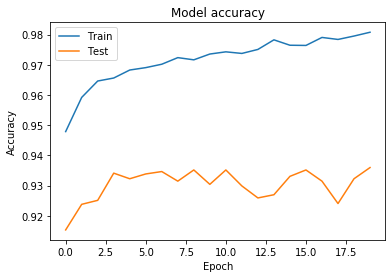

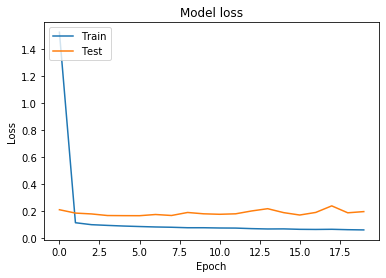

In [285]:
import matplotlib.pyplot as plt
history = model.fit(features,labels, validation_split=0.2, epochs=20)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [286]:
from sklearn.ensemble import RandomForestRegressor

In [287]:
rf = RandomForestRegressor(n_estimators=1000, random_state=42,max_features='sqrt')
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)

In [290]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(test_labels,predictions.round()))
print(classification_report(test_labels,predictions.round()))
print(accuracy_score(test_labels, predictions.round()))

[[3542   26]
 [  68  144]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3568
           1       0.85      0.68      0.75       212

    accuracy                           0.98      3780
   macro avg       0.91      0.84      0.87      3780
weighted avg       0.97      0.98      0.97      3780

0.9751322751322752


In [291]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Ratio_crdt_trnovr_0_6mois Importance: 0.08
Variable: Ratio_dbt_bal_0_12mois Importance: 0.08
Variable: Ratio_dbt_bal_0_6mois Importance: 0.07
Variable: top_clot_cav12       Importance: 0.06
Variable: Ratio_dbt_trnovr_0_6mois Importance: 0.05
Variable: Ratio_dbt_trnovr_0_12mois Importance: 0.05
Variable: change_nb_prod       Importance: 0.04
Variable: MONS_INLIM_SERCL     Importance: 0.04
Variable: Avg_Crdt_trnovr_6mois Importance: 0.03
Variable: Ratio_crdt_trnovr_6_12mois Importance: 0.03
Variable: Ratio_dbt_bal_6_12mois Importance: 0.03
Variable: MONS_INLIM_NB_PROD   Importance: 0.03
Variable: Avg_Dbt_Bal_6mois    Importance: 0.02
Variable: Avg_Crdt_trnovr_12mois Importance: 0.02
Variable: Avg_Dbt_trnovr_6mois Importance: 0.02
Variable: Avg_Dbt_trnovr_12mois Importance: 0.02
Variable: Ratio_dbt_trnovr_6_12mois Importance: 0.02
Variable: Ratio_Savngs_bal_0_6mois Importance: 0.02
Variable: Ratio_Savngs_bal_0_12mois Importance: 0.02
Variable: Ratio_Savngs_bal_6_12mois Importanc